In [1]:
# https://signate.jp/competitions/984
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submit.csv",header=None)

In [2]:
# trainデータの先頭行を表示
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,23.059782,6,140,110,2815,17.977429,80,1,dodge aspen
1,3,17.674521,8,350,150,4456,13.514535,72,1,dodge rampage
2,4,17.136353,8,302,140,2774,13.209912,79,1,mercury cougar brougham
3,7,22.664666,6,400,85,2190,15.196381,71,1,pontiac j2000 se hatchback
4,9,17.872018,8,429,220,2245,9.621400,70,1,ford galaxie 500


In [3]:
# testデータの先頭行を表示
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,4,98,67,2000,15.049795,81,1,peugeot 504
1,2,4,97,90,2720,15.339172,79,1,dodge aspen
2,5,4,90,75,2807,17.821599,77,1,dodge monaco brougham
3,6,4,140,110,2807,13.780354,82,2,buick century limited
4,8,4,121,85,3070,13.688921,73,2,saab 99le


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   mpg           500 non-null    float64
 2   cylinders     500 non-null    int64  
 3   displacement  500 non-null    int64  
 4   horsepower    500 non-null    object 
 5   weight        500 non-null    int64  
 6   acceleration  500 non-null    float64
 7   model year    500 non-null    int64  
 8   origin        500 non-null    int64  
 9   car name      500 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 39.2+ KB


In [ ]:
print(train["cylinders"].unique()) # 整数
print(train["displacement"].unique()) # 整数
print(train["horsepower"].unique()) # object(?が入ってるカラムあり)
print(train["weight"].unique()) # 整数
print(train["acceleration"].unique()) # 浮動小数点
print(train["model year"].unique()) # 整数
print(train["origin"].unique()) # 整数
print(train["car name"].unique()) # 文字列

In [11]:
print(train[train['horsepower'] == '?'])

      id        mpg  cylinders  displacement horsepower  weight  acceleration  \
10    24  44.763897          4            85          ?    1755     17.503013   
48    96  23.008702          4           140          ?    1760     19.472427   
224  454  28.146944          4           140          ?    1760     19.420540   
286  574  44.021790          4            85          ?    1955     20.795175   
320  645  44.410105          4            85          ?    1955     21.057837   
407  815  28.048825          4           140          ?    1760     19.139558   
415  831  28.079580          4           140          ?    1760     17.268393   
455  901  27.536418          4           140          ?    1760     19.243466   
487  970  27.725048          4           140          ?    1760     19.532434   

     model year  origin              car name  
10           80       2  renault lecar deluxe  
48           76       1             vw rabbit  
224          76       1             vw rabbit

In [12]:
# testデータの統計的な情報を表示
print(test.describe())

              id   cylinders  displacement       weight  acceleration  \
count  500.00000  500.000000    500.000000   500.000000    500.000000   
mean   498.82400    5.148000    186.534000  2740.426000     15.301564   
std    289.26911    1.617197    103.173108   688.956869      2.222428   
min      1.00000    4.000000     80.000000  1613.000000      9.550639   
25%    252.75000    4.000000    104.000000  2197.500000     13.467201   
50%    490.00000    4.000000    140.000000  2702.000000     15.255378   
75%    748.50000    6.000000    302.000000  3212.000000     17.182176   
max    999.00000    8.000000    429.000000  4732.000000     21.770354   

       model year      origin  
count   500.00000  500.000000  
mean     76.31600    1.448000  
std       3.83426    0.764503  
min      70.00000    1.000000  
25%      73.00000    1.000000  
50%      76.00000    1.000000  
75%      80.00000    2.000000  
max      82.00000    3.000000  


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   cylinders     500 non-null    int64  
 2   displacement  500 non-null    int64  
 3   horsepower    500 non-null    object 
 4   weight        500 non-null    int64  
 5   acceleration  500 non-null    float64
 6   model year    500 non-null    int64  
 7   origin        500 non-null    int64  
 8   car name      500 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 35.3+ KB


In [ ]:
print(test["cylinders"].unique()) # 整数
print(test["displacement"].unique()) # 整数
print(test["horsepower"].unique()) # object(?が入ってるカラムあり)
print(test["weight"].unique()) # 整数
print(test["acceleration"].unique()) # 浮動小数点
print(test["model year"].unique()) # 整数
print(test["origin"].unique()) # 整数
print(test["car name"].unique()) # 文字列

In [15]:
print(test[test['horsepower'] == '?'])

      id  cylinders  displacement horsepower  weight  acceleration  \
98   206          4            85          ?    4274     20.917523   
181  358          4            85          ?    1955     17.750490   
381  765          4           140          ?    2125     19.516352   
387  780          4           140          ?    1760     13.459806   
407  814          4            85          ?    1755     17.537356   
435  875          4           140          ?    1760     19.247418   

     model year  origin              car name  
98           78       2            ford pinto  
181          80       2         pontiac astro  
381          76       1             vw rabbit  
387          71       1             vw rabbit  
407          80       1  renault lecar deluxe  
435          71       1             vw rabbit  


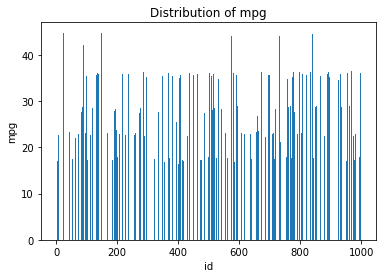

<Figure size 720x720 with 0 Axes>

In [26]:
# 目的変数(charges)の分布を可視化
plt.ylabel('mpg')
plt.xlabel('id')
plt.title('Distribution of mpg')
plt.bar(train['id'], train['mpg'])
fig = plt.figure(figsize = (10,10), facecolor='lightblue')
plt.show()

In [4]:
# "?"をNaN（欠損値）に変換
train["horsepower"] = train["horsepower"].replace("?", pd.NA)

# "horsepower"列を数値に変換
# downcastオプションで「整数」、「符号付き」、「符号なし」が指定可能
train["horsepower"] = pd.to_numeric(train["horsepower"], errors="coerce", downcast='signed')

# 欠損値を平均値で埋める（他の代表値を使いたい場合は中央値や最頻値などを指定）
mean_horsepower = train["horsepower"].median()
train["horsepower"].fillna(mean_horsepower, inplace=True)

train["horsepower"].unique()

array([110, 150, 140,  85, 220, 165,  60,  97,  90,  67,  72, 122, 139,
        88, 100, 105,  54,  71,  78,  75, 148, 130,  95,  70, 112,  69,
       132, 120, 108,  74,  96,  61, 193,  58,  82,  80, 145,  64, 135],
      dtype=int16)

In [7]:
# trainデータの統計的な情報を表示
train.describe()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,500.176000,27.010940,5.192000,194.762000,106.668000,2719.71400,15.300328,76.332000,1.420000
std,288.657179,7.356249,1.617519,106.277425,35.301759,717.03541,2.261096,3.909007,0.759443
min,0.000000,15.787613,4.000000,79.000000,54.000000,1755.00000,9.530859,70.000000,1.000000
25%,242.250000,22.396641,4.000000,104.000000,85.000000,2178.75000,13.441562,73.000000,1.000000
50%,513.000000,26.228984,4.000000,140.000000,97.000000,2615.00000,15.231923,76.000000,1.000000
75%,750.250000,35.088333,6.000000,302.000000,130.000000,3193.00000,17.190531,80.000000,2.000000
max,997.000000,44.763897,8.000000,429.000000,220.000000,4732.00000,21.922511,82.000000,3.000000


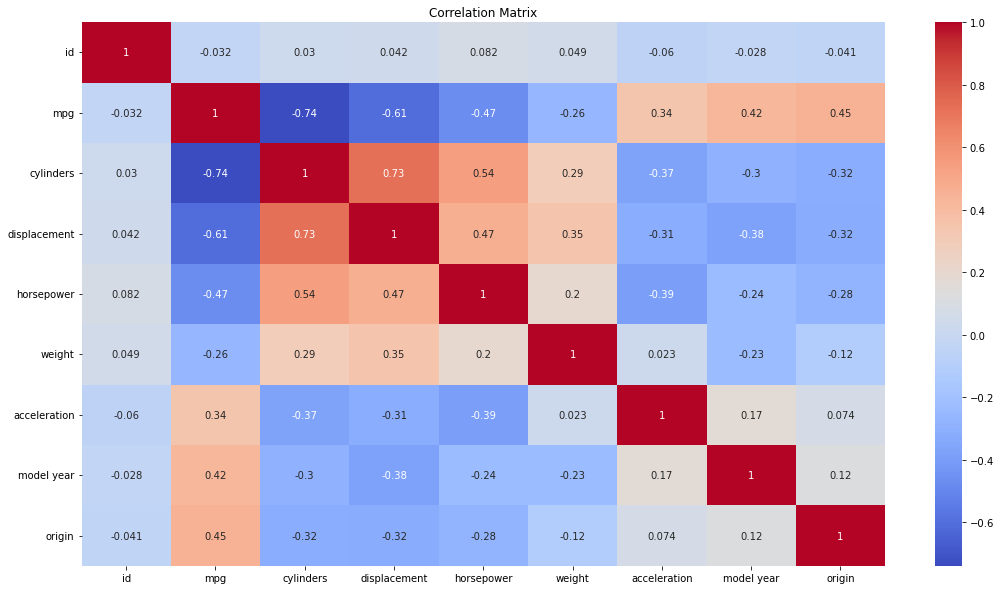

In [3]:
# 数値列の相関行列を計算
correlation_matrix = train.corr()
# 相関行列のヒートマップを可視化
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

id             -0.032431
cylinders      -0.739658
displacement   -0.605029
horsepower     -0.470498
weight         -0.261404
acceleration    0.344398
model year      0.422820
origin          0.454347
Name: mpg, dtype: float64


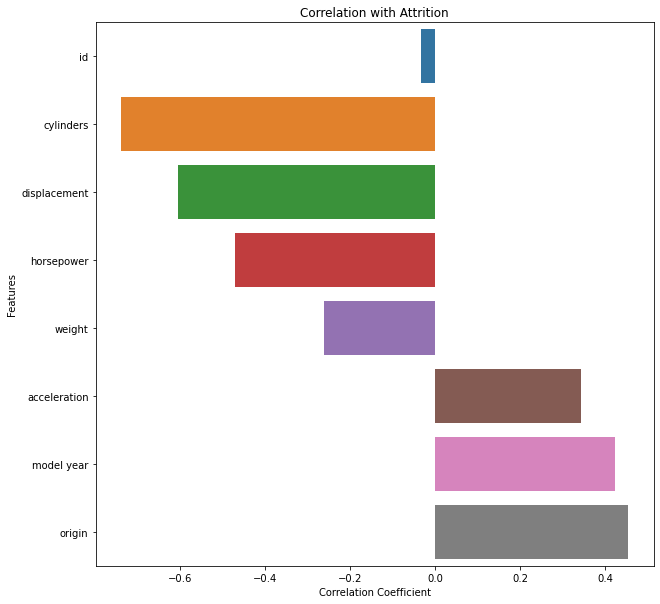

In [8]:
correlation_with_price_range = train.corr()['mpg'].drop('mpg')
print(correlation_with_price_range)

#横棒グラフで相関係数を表示 
#y_corrには特定の列の相関係数を格納 
fig, ax = plt.subplots(figsize=(10, 10)) 
#横棒グラフ作成 
sns.barplot(x=correlation_with_price_range, y=correlation_with_price_range.index, ax=ax) 
#X,Y軸とグラフタイトル 
ax.set_xlabel("Correlation Coefficient") 
ax.set_ylabel("Features") 
ax.set_title(f"Correlation with Attrition") 
#表示 
plt.show()

In [1]:
train_age_unique = train["Age"].unique()
print(np.sort(train_age_unique))

test_age_unique = test["Age"].unique()
print(np.sort(test_age_unique))

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# print(train["Age"])

NameError: name 'train' is not defined